# <font color="#B40404">Un peu d'analyse financière avec Python 3.4</font>

## <font color="#084B8A">Qu'est ce que vous apprendrai dans ce tutoriel</font>

- Analyse des séries chronologiques avec Pandas
- Utilisation de Google Trends pour prédire les mouvements du marché
- Construire votre propre stratégie de trading en utilisant Zipline
- Stratégies de négociation communes:
    - trading Momentum
    - Retour à la moyenne

## <font color="#084B8A">Les différentes étapes vers une stratégie de négociation réussie</font>

1. L'analyse des données
    - Pandas + Matplotlib (Partie I)
2. Stratégie backtest
    - Pandas peuvent être utilisés, mais de nombreuses limites (Partie II )
    - Zipline (Partie III )
3. tratégie de test Forward
    - Trivial sur Quantopian (Partie IV )

## <font color="#084B8A">Bases de Pandas (Analyse de données)</font>

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

In [2]:
import datetime

import pandas as pd
import pandas.io.data
from pandas import Series, DataFrame
pd.__version__

'0.16.2'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'1.4.3'

## <font color="#084B8A">Création / Chargement de données - séries chronologiques</font>

- De construction Python
- De Yahoo finance
- De fichiers CSV

### <font color="#585858">De construction Python</font>

In [4]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series([1, 2, 3, 4, 5], index=labels)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
'b' in s

True

In [6]:
s['b']

2

In [7]:
mapping = s.to_dict()
mapping

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [8]:
Series(mapping)

a    1
b    2
c    3
d    4
e    5
dtype: int64

### <font color="#585858">De Yahoo finance</font>

In [9]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2006, 10, 1), 
                                 end=datetime.datetime(2012, 1, 1))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193


### <font color="#585858">De fichiers CSV</font>

In [10]:
aapl.to_csv('aapl_ohlc.csv')
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193


In [11]:
Location = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Applications Python 3.4/aapl_ohlc.csv'
df = pd.read_csv(Location, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193


In [12]:
df.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13', 
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None, tz=None)

## <font color="#084B8A">Séries et dataframe : Premiers pas</font>

- Indexation
- Découpage
- Création de nouvelles colonnes

In [13]:
ts = df['Close'][-10:]
ts

Date
2011-12-16    381.019989
2011-12-19    382.210003
2011-12-20    395.949997
2011-12-21    396.450008
2011-12-22    398.550003
2011-12-23    403.330006
2011-12-27    406.529999
2011-12-28    402.640003
2011-12-29    405.120007
2011-12-30    405.000004
Name: Close, dtype: float64

Un dataframe est une collection de série d'objets. Le découpage d'une colonne du dataframe retourne une série.

In [14]:
type(ts)

pandas.core.series.Series

In [15]:
date = ts.index[5]
date

Timestamp('2011-12-23 00:00:00')

In [16]:
ts[date]

403.33000600000003

In [17]:
ts[5]

403.33000600000003

Nous pouvons également sélectionner plusieurs colonnes.

In [18]:
df[['Open','Close']].head()

,Open,Close
Date,,
2006-10-02,75.100003,74.859998
2006-10-03,74.450002,74.080000
2006-10-04,74.100000,75.380003
2006-10-05,74.529997,74.829997
2006-10-06,74.420001,74.220003


De nouvelles colonnes peuvent être ajoutées à la volée.

In [19]:
df['diff'] = df.Open - df.Close
df.head()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863,0.240005
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671,0.370002
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659,-1.280003
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894,-0.300000
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193,0.199998


...et supprimées à la volée.

In [20]:
del df['diff']
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193


## <font color="#084B8A">Calculs financiers généraux</font>

- Moyenne mobile
- Résultats

In [21]:
close_px = df['Adj Close']

In [22]:
mavg = pd.rolling_mean(close_px, 40)
mavg[-10:]

Date
2011-12-16    51.425441
2011-12-19    51.390183
2011-12-20    51.357704
2011-12-21    51.353338
2011-12-22    51.346558
2011-12-23    51.342059
2011-12-27    51.347285
2011-12-28    51.340207
2011-12-29    51.368684
2011-12-30    51.393788
dtype: float64

In [23]:
rets = close_px / close_px.shift(1) - 1
rets.head()

Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj Close, dtype: float64

Ou encore .pct_change().

In [24]:
close_px.pct_change().head()

Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj Close, dtype: float64

## <font color="#084B8A">Tracés Basiques</font>

Les series et les DataFrames ont une commande commune .plot() (utilise Matplotlib en fait).

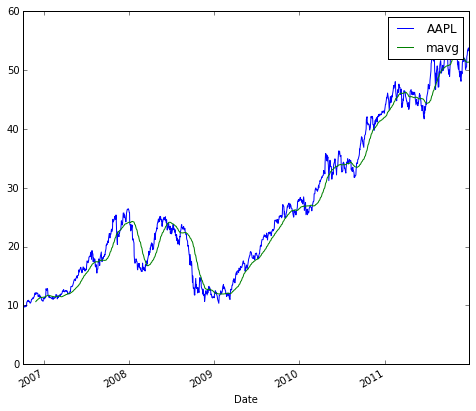

In [25]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## <font color="#084B8A">Facultatif : Si on a du temps ... </font>

In [26]:
df = pd.io.data.get_data_yahoo(['AAPL', 'GE', 'GOOG', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
df.head()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2010-01-04,28.313195,12.556963,313.062468,115.385996,23.689561,26.227603,50.953113
2010-01-05,28.362145,12.621983,311.683844,113.992138,23.402993,26.236076,51.568809
2010-01-06,27.911008,12.556963,303.826685,113.251641,23.394688,26.075067,51.052955
2010-01-07,27.859412,13.207162,296.753749,112.859619,23.336543,25.803894,50.728467
2010-01-08,28.044630,13.491624,300.709808,113.992138,22.904616,25.981851,50.562061


In [27]:
rets = df.pct_change()

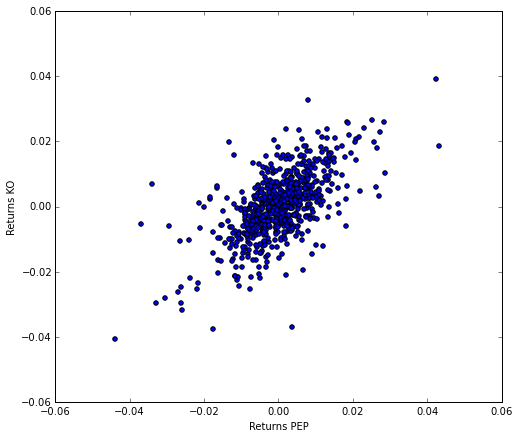

In [28]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns PEP')
plt.ylabel('Returns KO')

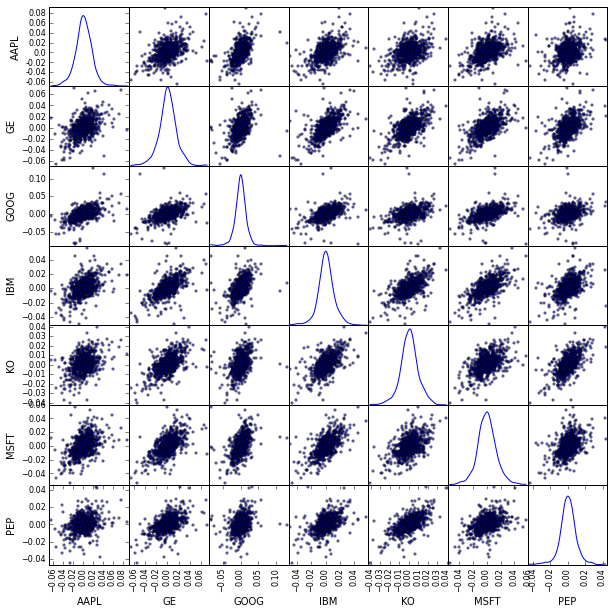

In [29]:
pd.scatter_matrix(rets, diagonal='kde', figsize=(10, 10));

In [30]:
corr = rets.corr()
corr

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
AAPL,1.000000,0.457052,0.533387,0.501587,0.388007,0.472767,0.308964
GE,0.457052,1.000000,0.462696,0.609330,0.593856,0.600065,0.533503
GOOG,0.533387,0.462696,1.000000,0.470778,0.404099,0.472851,0.329938
IBM,0.501587,0.609330,0.470778,1.000000,0.601483,0.646124,0.491088
KO,0.388007,0.593856,0.404099,0.601483,1.000000,0.523480,0.635843
MSFT,0.472767,0.600065,0.472851,0.646124,0.523480,1.000000,0.477424
PEP,0.308964,0.533503,0.329938,0.491088,0.635843,0.477424,1.000000


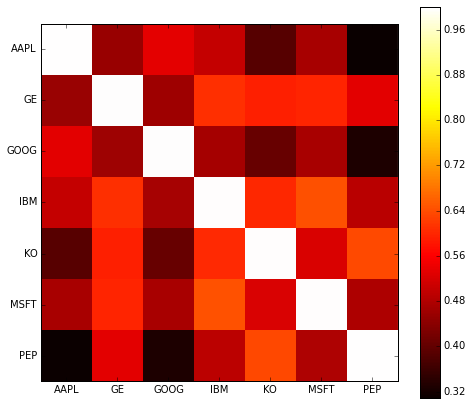

In [31]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Une chose à la quelle nous nous intéressons souvent est la relation entre les rendements attendus et le risque que nous prenons. Souvent, il y a un compromis entre les deux.

Ici, nous utilisons plt.annotate de mettre des étiquettes sur le nuage.

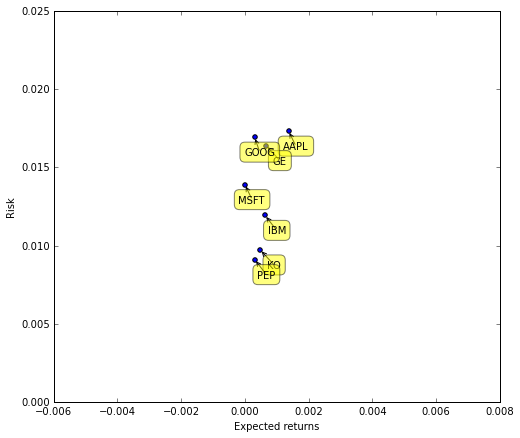

In [32]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## <font color="#084B8A">L'alignement des données et le traitement des valeurs manquantes</font>

- Join, merge, concatenate
- Remplissage des NaNs

Permet de tirer quelques titres de Yahoo finance et construire un dataframe des cours de clôture ajustés .

In [33]:
series_list = []
securities = ['AAPL', 'GOOG', 'IBM', 'MSFT']
for security in securities:
    s = pd.io.data.get_data_yahoo(security, start=datetime.datetime(2011, 10, 1), end=datetime.datetime(2013, 1, 1))['Adj Close']
    s.name = security # Renomme les séries de sorte que cela coincide avec les noms de la liste securities
    series_list.append(s)

pd.concat peut être utilisé pour concaténer plusieurs Series en un seul dataframe.

In [34]:
df = pd.concat(series_list, axis=1)
df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,49.559007,247.512918,155.828357,21.621063
2011-10-04,49.281181,250.699734,157.132258,22.335007
2011-10-05,50.041895,252.098341,159.029643,22.819783
2011-10-06,49.925473,257.098352,163.381935,23.216420
2011-10-07,48.923974,257.303137,164.011397,23.137092


In [35]:
df.ix[0, 'AAPL'] = np.nan
df.ix[1, ['GOOG', 'IBM']] = np.nan
df.ix[[1, 2, 3], 'MSFT'] = np.nan

df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,247.512918,155.828357,21.621063
2011-10-04,49.281181,NaN,NaN,NaN
2011-10-05,50.041895,252.098341,159.029643,NaN
2011-10-06,49.925473,257.098352,163.381935,NaN
2011-10-07,48.923974,257.303137,164.011397,23.137092


Pandas supporte bien les calculs avec des valeurs manquantes.

In [36]:
(df.AAPL + df.GOOG).head()

Date
2011-10-03           NaN
2011-10-04           NaN
2011-10-05    302.140236
2011-10-06    307.023825
2011-10-07    306.227111
dtype: float64

Une approche générale pour imputer les valeurs manquantes dans les séries chronologiques est le remplissage forward (forward filling).

In [37]:
df.ffill().head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,247.512918,155.828357,21.621063
2011-10-04,49.281181,247.512918,155.828357,21.621063
2011-10-05,50.041895,252.098341,159.029643,21.621063
2011-10-06,49.925473,257.098352,163.381935,21.621063
2011-10-07,48.923974,257.303137,164.011397,23.137092
